### Fourier Transform element-wise matrix multiplication concept proof

In [1]:
%matplotlib inline

import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from scipy import ndimage
import cmath
import math

### Read an Image as grayscale

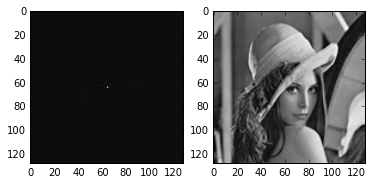

In [2]:
face = misc.imread('lena128.jpg', 'L')

face_dummy_fft = np.fft.fft2(face)
face_dummy_fft_shift = np.fft.fftshift(face_dummy_fft)

plt.subplot(121)
plt.imshow(face_dummy_fft_shift.real, cmap=plt.cm.gray)

face_dummy_fft_shift2 = np.fft.fftshift(face_dummy_fft)
face_dummy_ifft = np.fft.ifft2(face_dummy_fft_shift2)
plt.subplot(122)
plt.imshow(np.abs(face_dummy_ifft), cmap=plt.cm.gray)

### Convolute small kernel with the picture
$K = \begin{bmatrix}
        -1 & -1 & -1 \\
        -1 & 8 & -1 \\
        -1 & -1 & -1 \\
        \end{bmatrix}
$

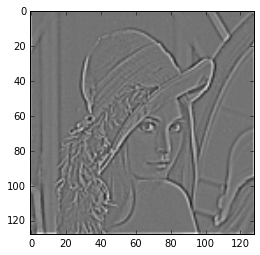

In [3]:
small_kernel = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ])
face_conv_sm_kernel = ndimage.convolve(face, small_kernel, mode='constant', cval=0.0)
plt.imshow(face_conv_sm_kernel, cmap=plt.cm.gray)
plt.show()

# FFT POLAR section
do the $FFT$ of the image then separate the $Phase$ and $Magnitude$ into specify arrays
- left picture: plot of the Phase of $FFT$
- right picture: plot of the Magnitude of $FFT$ need to do log transform for visualization

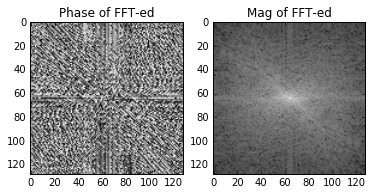

In [4]:
# do the fft of the image
face_fft = np.fft.fft2(face)
face_fft_shift = np.fft.fftshift(face_fft)

# loop to assign each number's phase into phase_face_fft
phase_face_fft = np.zeros((128,128))
magnitude_face_fft = np.zeros((128,128))
mod255_magnitude_face_fft = np.zeros((128,128))

# loop to add values of Phase and log(Magnitude) in the array
# note: the log is only for visualization
for i in range(len(face_fft_shift)):
    for j in range(len(face_fft_shift)):
        phase_face_fft[i,j] = cmath.polar(face_fft_shift[i,j])[1]
        magnitude_face_fft[i,j] = np.log(cmath.polar(face_fft_shift[i,j])[0])

# just for plotting
plt.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(121)
plt.title("Phase of FFT-ed")
plt.imshow(phase_face_fft, cmap=plt.cm.gray)

plt.subplot(122)
plt.title("Mag of FFT-ed")
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)

### Padding the Filter

In [5]:
small_kernel = np.array([
        [-1,-1,-1],
        [-1,8,-1],
        [-1,-1,-1]
    ])
small_kernel_zerop_cent = np.lib.pad(small_kernel, ((63,62),(62,63)), 'constant')
small_kernel_zerop_tl = np.lib.pad(small_kernel,
                                   ((0, 125), (0, 125)), 'constant')

print(small_kernel_zerop_cent.shape)
print(small_kernel_zerop_cent)

print(small_kernel_zerop_tl.shape)
print(small_kernel_zerop_tl)

(128L, 128L)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
(128L, 128L)
[[-1 -1 -1 ...,  0  0  0]
 [-1  8 -1 ...,  0  0  0]
 [-1 -1 -1 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]


# Convolution w/ Image 
## Center Kernel
### *fft-image with center-fft-filter (already shifted both) *

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


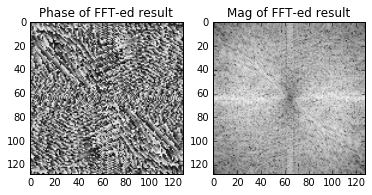

In [6]:
k_cent_fft = np.fft.fft2(small_kernel_zerop_cent)
k_cent_fft_shift = np.fft.fftshift(k_cent_fft)

result_cent = face_fft_shift*k_cent_fft_shift

phase_face_fft_cent = np.zeros((128,128))
magnitude_face_fft_cent = np.zeros((128,128))

for i in range(len(result_cent)):
    for j in range(len(result_cent)):
        phase_face_fft_cent[i,j] = cmath.polar(result_cent[i,j])[1]
        magnitude_face_fft_cent[i,j] = np.log(cmath.polar(result_cent[i,j])[0])
        
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# just for plotting        
plt.subplot(121)
plt.title("Phase of FFT-ed result")
plt.imshow(phase_face_fft_cent, cmap=plt.cm.gray)

plt.subplot(122)
plt.title("Mag of FFT-ed result")
plt.imshow(magnitude_face_fft_cent, cmap=plt.cm.gray)


### *Re-shift and $IFFT$ of Center-Kernel*

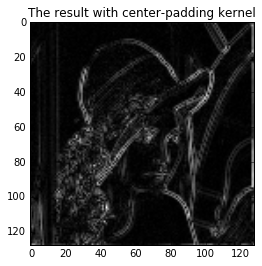

In [19]:
reverse_result_cent_reshift = np.fft.fftshift(
    np.fft.ifft2(result_cent))

plt.title("The result with center-padding kernel")
plt.imshow(np.abs(reverse_result_cent_reshift), cmap=plt.cm.gray)

## TL Kernel
### *fft-image with TL-fft-filter (already shifted both) *

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


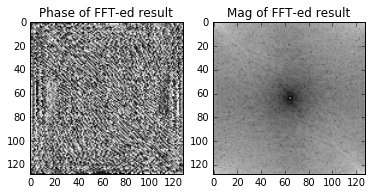

In [12]:
k_tl_fft = np.fft.fft2(small_kernel_zerop_tl)
k_tl_fft_shift = np.fft.fftshift(k_tl_fft)

result_tl = face_fft*k_tl_fft_shift

phase_face_fft_tl = np.zeros((128,128))
magnitude_face_fft_tl = np.zeros((128,128))

for i in range(len(result_tl)):
    for j in range(len(result_tl)):
        phase_face_fft_tl[i,j] = cmath.polar(result_tl[i,j])[1]
        magnitude_face_fft_tl[i,j] = np.log(cmath.polar(result_tl[i,j])[0])
        
plt.subplots_adjust(hspace=0.2, wspace=0.2)

# just for plotting        
plt.subplot(121)
plt.title("Phase of FFT-ed result")
plt.imshow(phase_face_fft_tl, cmap=plt.cm.gray)

plt.subplot(122)
plt.title("Mag of FFT-ed result")
plt.imshow(magnitude_face_fft_tl, cmap=plt.cm.gray)

### *Re-shift and $IFFT$ of Center-Kernel*

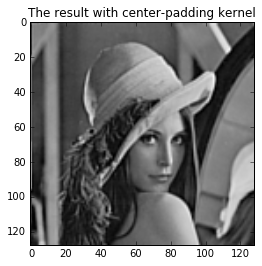

In [18]:
reverse_result_tl_reshift = np.fft.ifft2(result_tl)

plt.title("The result with center-padding kernel")
plt.imshow(np.abs(reverse_result_tl_reshift), cmap=plt.cm.gray)

# Fourier Experiment with multiple shapes

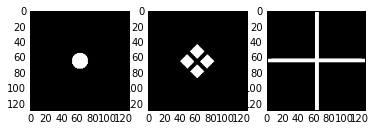

In [23]:
circ = misc.imread('simple_circle.jpg', 'L')
plt.subplot(131)
plt.imshow(circ, cmap=plt.cm.gray)

squa = misc.imread('simple_square.jpg', 'L')
plt.subplot(132)
plt.imshow(squa, cmap=plt.cm.gray)

linee = misc.imread('simple_line.jpg', 'L')
plt.subplot(133)
plt.imshow(linee, cmap=plt.cm.gray)

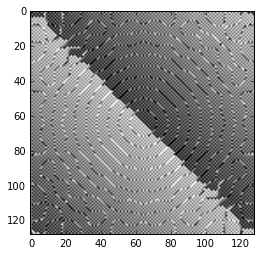

In [66]:
circ_fft = np.fft.fft2(circ)
squa_fft = np.fft.fft2(squa)
linee_fft = np.fft.fft2(linee)

circ_fft = np.fft.fftshift(circ_fft)
for i in range(len(circ_fft)):
    for j in range(len(circ_fft)):
        phase_face_fft[i,j] = cmath.polar(circ_fft[i,j])[1]
        magnitude_face_fft[i,j] = cmath.polar(circ_fft[i,j])[0]

plt.imshow(phase_face_fft, cmap=plt.cm.gray)

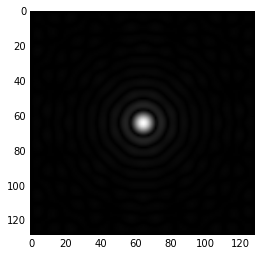

In [67]:
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)

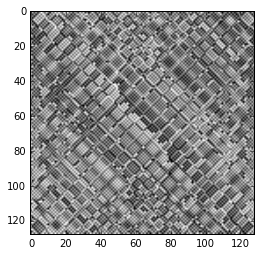

In [68]:
squa_fft = np.fft.fftshift(squa_fft)

for i in range(len(squa_fft)):
    for j in range(len(squa_fft)):
        phase_face_fft[i,j] = cmath.polar(squa_fft[i,j])[1]
        magnitude_face_fft[i,j] = cmath.polar(squa_fft[i,j])[0]
        
plt.imshow(phase_face_fft, cmap=plt.cm.gray)

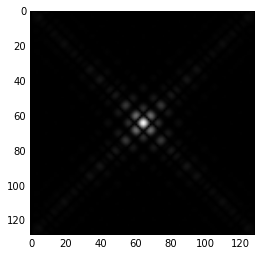

In [69]:
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)

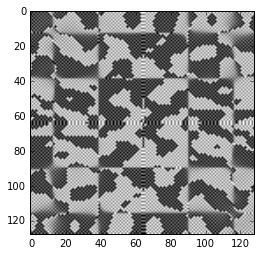

In [70]:
linee_fft = np.fft.fftshift(linee_fft)

for i in range(len(linee_fft)):
    for j in range(len(linee_fft)):
        phase_face_fft[i,j] = cmath.polar(linee_fft[i,j])[1]
        magnitude_face_fft[i,j] = cmath.polar(linee_fft[i,j])[0]
        
plt.imshow(phase_face_fft, cmap=plt.cm.gray)

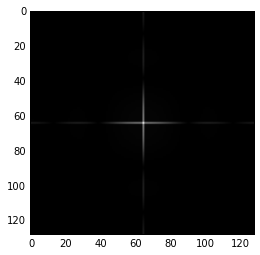

In [71]:
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)

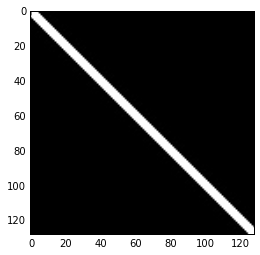

In [62]:
lineud = misc.imread('lineud.jpg', 'L')
plt.imshow(lineud, cmap=plt.cm.gray)
lineud_fft = np.fft.fft2(lineud)
lineud_fft = np.fft.fftshift(lineud_fft)

for i in range(len(lineud_fft)):
    for j in range(len(lineud_fft)):
        phase_face_fft[i,j] = cmath.polar(lineud_fft[i,j])[1]
        magnitude_face_fft[i,j] = cmath.polar(lineud_fft[i,j])[0]

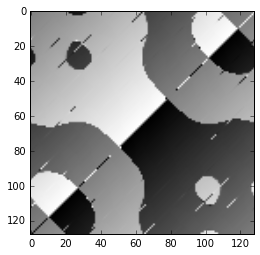

In [64]:
plt.imshow(phase_face_fft, cmap=plt.cm.gray)

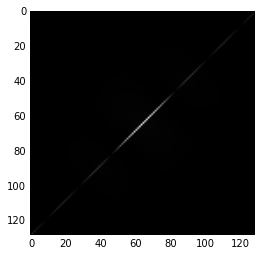

In [65]:
plt.imshow(magnitude_face_fft, cmap=plt.cm.gray)